# Let's look at our sample and try to tease out some systematics

In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist, cdist
from matplotlib import pyplot as plt
from glob import glob

In [2]:
sdss_queries = glob('../data/GaiaQueries/DR3*')
sdss = []
for q in sdss_queries:
    df = pd.read_csv(q, index_col=0, usecols=['source_id','phot_g_mean_mag','r_med_photogeo','ag_gspphot','bp_rp','ebpminrp_gspphot','u','err_u','g','err_g','r','err_r','i','err_i','z','err_z'])
    df.loc[np.isnan(df['ag_gspphot']),'ag_gspphot'] = 0.0
    df.loc[np.isnan(df['ebpminrp_gspphot']),'ebpminrp_gspphot'] = 0.0
    df.replace(-9999.0, np.nan, inplace=True)
    df['bp_rp_0'] = df['bp_rp'] - df['ebpminrp_gspphot']
    sdss.append(df)
sdss = pd.concat(sdss)
sdss.head()

,phot_g_mean_mag,bp_rp,ag_gspphot,ebpminrp_gspphot,r_med_photogeo,u,err_u,g,err_g,r,err_r,i,err_i,z,err_z,bp_rp_0
source_id,,,,,,,,,,,,,,,,
5041740170358770944,14.197693,0.851795,0.0549,0.0294,773.41760,15.99190,0.006203,14.66312,0.002955,14.17544,0.003381,14.52660,0.003876,13.98173,0.004101,0.822395
3504476267364687232,14.597240,0.838298,0.1833,0.0989,973.47570,16.25610,0.006034,15.00364,0.003116,14.58853,0.003069,14.43296,0.003406,14.37867,0.004086,0.739398
6240929124265524096,11.277658,0.833157,0.2195,0.1189,415.14470,14.26308,0.005417,12.04220,0.000987,11.35405,0.000883,11.19708,0.000958,12.96183,0.013169,0.714257
6279444260669526784,14.968318,1.242106,0.5598,0.2985,5820.54440,17.58118,0.012508,15.72356,0.003418,14.94544,0.003503,14.61933,0.003841,14.42062,0.004258,0.943606
5458335780274988032,11.320326,0.866427,0.1691,0.0911,303.99237,14.26307,0.004319,12.18475,0.001185,13.72176,0.006597,11.21733,0.001004,12.39492,0.006201,0.775327


In [3]:
gaia_spec = glob('../data/OutputFiles/synthetic*')
gaia = []
bands = ['u','g','r','i','z']
for s in gaia_spec:
    df = pd.read_csv(s, index_col=0)
    for band in bands:
        dmag = (2.5 / np.log(10))*df[f'Sdss_flux_error_{band}']/df[f'Sdss_flux_{band}']
        df.loc[:,f'Sdss_mag_{band}_error'] = dmag
    gaia.append(df)
gaia = pd.concat(gaia)
gaia.drop_duplicates(inplace=True)
gaia.head()

,Sdss_mag_u,Sdss_mag_g,Sdss_mag_r,Sdss_mag_i,Sdss_mag_z,Sdss_flux_u,Sdss_flux_g,Sdss_flux_r,Sdss_flux_i,Sdss_flux_z,Sdss_flux_error_u,Sdss_flux_error_g,Sdss_flux_error_r,Sdss_flux_error_i,Sdss_flux_error_z,Sdss_mag_u_error,Sdss_mag_g_error,Sdss_mag_r_error,Sdss_mag_i_error,Sdss_mag_z_error
source_id,,,,,,,,,,,,,,,,,,,,
5041740170358770944,15.886110,14.671517,14.175397,14.041373,14.001285,1.605299e-29,4.913525e-29,7.759635e-29,8.779119e-29,9.109318e-29,1.929281e-31,9.526776e-32,1.079710e-31,1.097714e-31,1.710697e-31,0.013049,0.002105,0.001511,0.001358,0.002039
3504476267364687232,16.215489,15.048675,14.586661,14.451706,14.400711,1.185235e-29,3.471604e-29,5.312947e-29,6.016135e-29,6.305445e-29,2.874475e-31,9.993177e-32,1.011128e-31,1.175334e-31,1.783643e-31,0.026332,0.003125,0.002066,0.002121,0.003071
6240929124265524096,12.877528,11.724772,11.265699,11.130312,11.076439,2.564418e-28,7.414657e-28,1.131672e-27,1.281962e-27,1.347177e-27,4.308746e-30,2.367196e-30,1.901199e-30,1.325545e-30,1.878004e-30,0.018243,0.003466,0.001824,0.001123,0.001514
6279444260669526784,17.504722,15.788334,14.955607,14.647730,14.469680,3.615023e-30,1.756574e-29,3.782310e-29,5.022360e-29,5.917361e-29,2.169566e-31,7.879414e-32,1.036239e-31,1.185829e-31,1.946543e-31,0.065161,0.004870,0.002975,0.002564,0.003572
5458335780274988032,12.994116,11.805503,11.305551,11.158472,11.107690,2.303316e-28,6.883334e-28,1.090887e-27,1.249140e-27,1.308952e-27,3.696911e-30,2.089872e-30,1.818976e-30,1.437645e-30,1.489040e-30,0.017426,0.003296,0.001810,0.001250,0.001235


In [4]:
times = pd.read_csv('../data/OutputFiles/obs_times.csv',index_col=0)
print(len(sdss),len(gaia),len(times))

4598275 4598275 4598275


In [5]:
merged = pd.merge(gaia,sdss, left_index=True, right_index=True)
merged = pd.merge(merged,times, left_index=True, right_index=True)
merged.drop_duplicates(inplace=True)
merged.dropna(inplace=True)
merged.head()

,Sdss_mag_u,Sdss_mag_g,Sdss_mag_r,Sdss_mag_i,Sdss_mag_z,Sdss_flux_u,Sdss_flux_g,Sdss_flux_r,Sdss_flux_i,Sdss_flux_z,...,err_g,r,err_r,i,err_i,z,err_z,bp_rp_0,mean_xp_bjd,sdss_bjd
source_id,,,,,,,,,,,,,,,,,,,,,
5041740170358770944,15.886110,14.671517,14.175397,14.041373,14.001285,1.605299e-29,4.913525e-29,7.759635e-29,8.779119e-29,9.109318e-29,...,0.002955,14.17544,0.003381,14.52660,0.003876,13.98173,0.004101,0.822395,57176.470449,54061.003939
3504476267364687232,16.215489,15.048675,14.586661,14.451706,14.400711,1.185235e-29,3.471604e-29,5.312947e-29,6.016135e-29,6.305445e-29,...,0.003116,14.58853,0.003069,14.43296,0.003406,14.37867,0.004086,0.739398,57166.948324,51667.006186
6240929124265524096,12.877528,11.724772,11.265699,11.130312,11.076439,2.564418e-28,7.414657e-28,1.131672e-27,1.281962e-27,1.347177e-27,...,0.000987,11.35405,0.000883,11.19708,0.000958,12.96183,0.013169,0.714257,57135.862350,53527.006320
6279444260669526784,17.504722,15.788334,14.955607,14.647730,14.469680,3.615023e-30,1.756574e-29,3.782310e-29,5.022360e-29,5.917361e-29,...,0.003418,14.94544,0.003503,14.61933,0.003841,14.42062,0.004258,0.943606,57126.819364,53880.006120
5458335780274988032,12.994116,11.805503,11.305551,11.158472,11.107690,2.303316e-28,6.883334e-28,1.090887e-27,1.249140e-27,1.308952e-27,...,0.001185,13.72176,0.006597,11.21733,0.001004,12.39492,0.006201,0.775327,57136.478267,53764.004158


In [6]:
merged.to_csv('../data/OutputFiles/merged_sdss_gaia_with_bjds.csv')

In [7]:
cleaner = ((merged['u'] < 17) & 
           (merged['g'] < 17) & 
           (merged['r'] < 17) & 
           (merged['i'] < 17) & 
           (merged['z'] < 17))
clean = merged[cleaner]
len(clean)

3462924

/Users/carina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


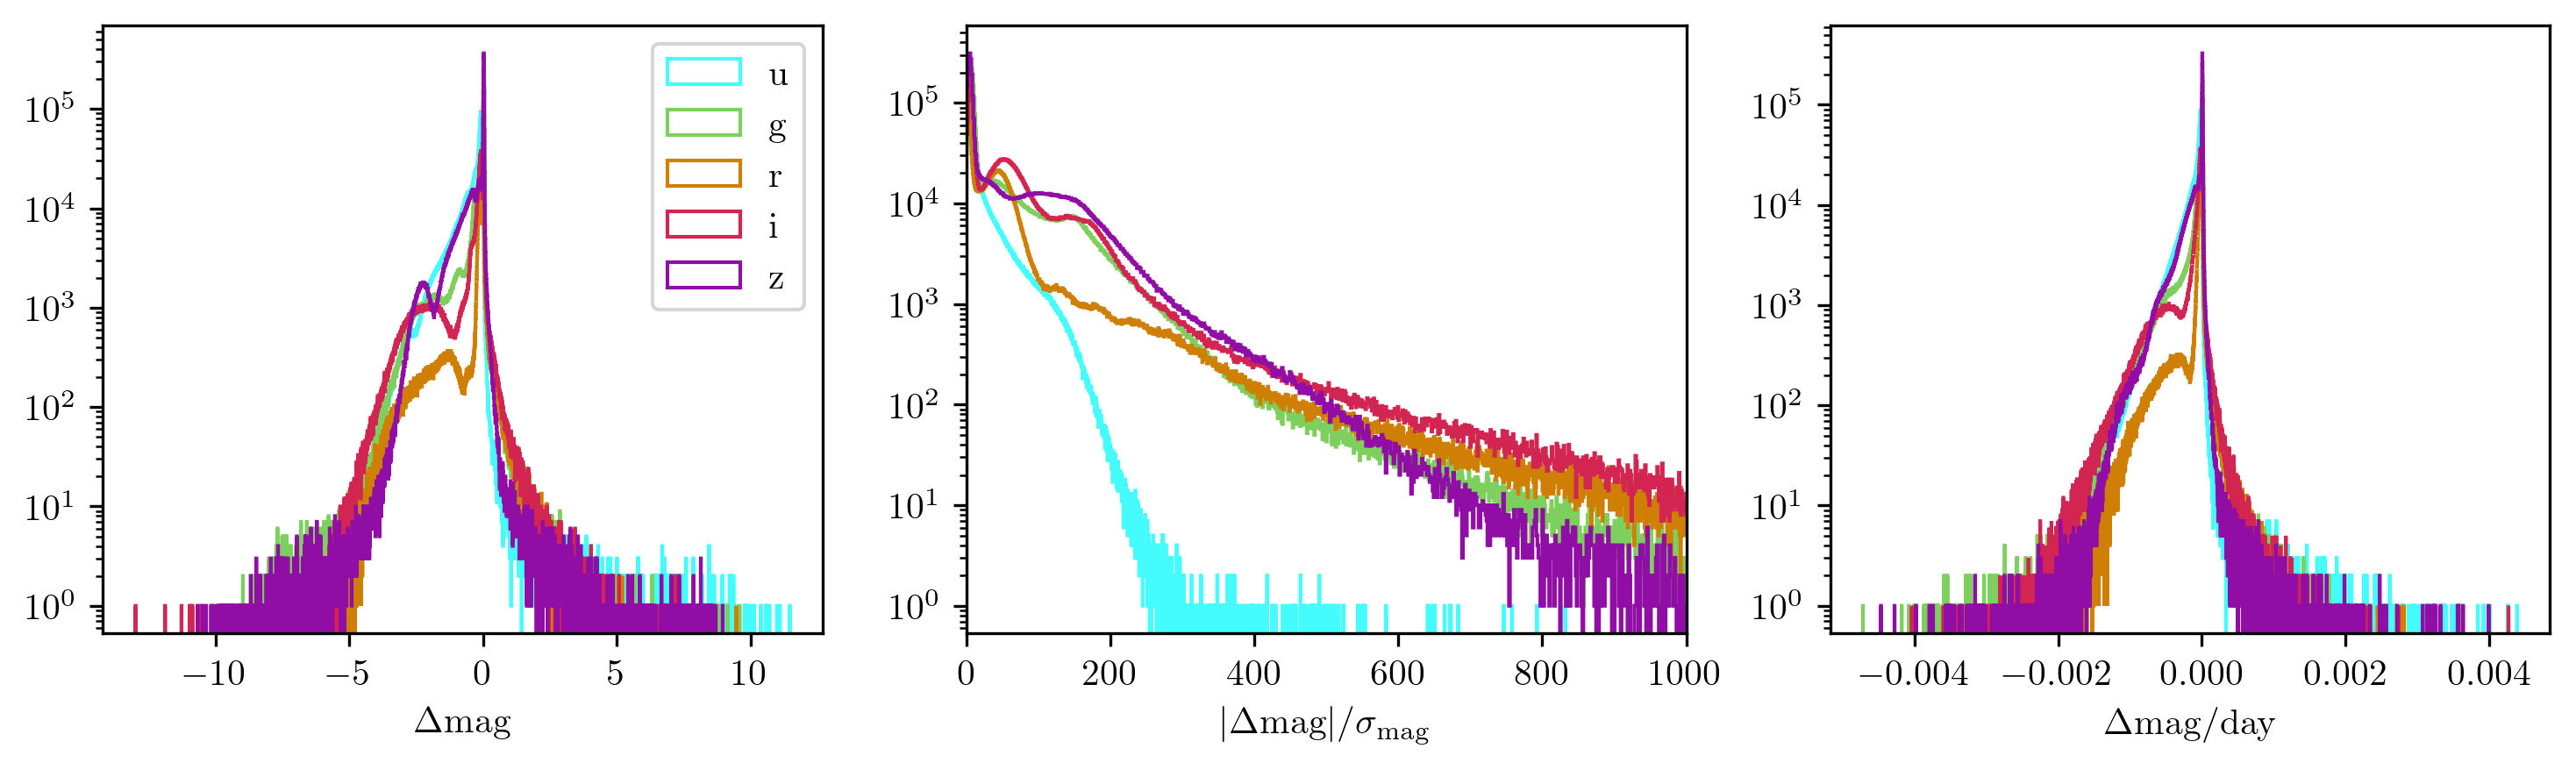

In [8]:
import cmasher as cmr

fig, ax = plt.subplots(1, 3, figsize=(12,3), dpi=300)
cmap = cmr.get_sub_cmap('cmr.tropical_r', start=0, stop=1)
band_c_dict = {'u':cmap(0),'g':cmap(0.25),'r':cmap(0.5),'i':cmap(0.75),'z':cmap(1-1e-14)}
df = pd.DataFrame()
for band in bands:
    dif = clean[f'Sdss_mag_{band}']-clean[band]
    ax[0].hist(dif, bins='auto', histtype='step', ec=band_c_dict[band], label=band)
    ax[1].hist(np.abs(dif) / np.sqrt(clean[f'err_{band}']**2.0 + clean[f'Sdss_mag_{band}_error']**2.0), bins='auto', histtype='step', ec=band_c_dict[band])
    ax[2].hist(dif / (clean['mean_xp_bjd']-clean['sdss_bjd']), bins='auto', histtype='step', ec=band_c_dict[band])
    clean.loc[:,f'Delta_{band}_per_kyr'] = 1e3*dif / (clean['mean_xp_bjd']-clean['sdss_bjd'])
ax[0].legend()
ax[0].set_xlabel(r'$\Delta$mag')
ax[1].set_xlabel(r'$|\Delta{\rm mag}|/\sigma_{\rm mag}$')
ax[2].set_xlabel(r'$\Delta{\rm mag}/{\rm day}$')
ax[0].set_yscale('log')
ax[1].set_xlim(0,1000)
ax[1].set_yscale('log')
ax[2].set_yscale('log')
#ax[2].set_xlim(-2,2)
plt.savefig('../plots/dmag_hist.pdf', bbox_inches='tight')

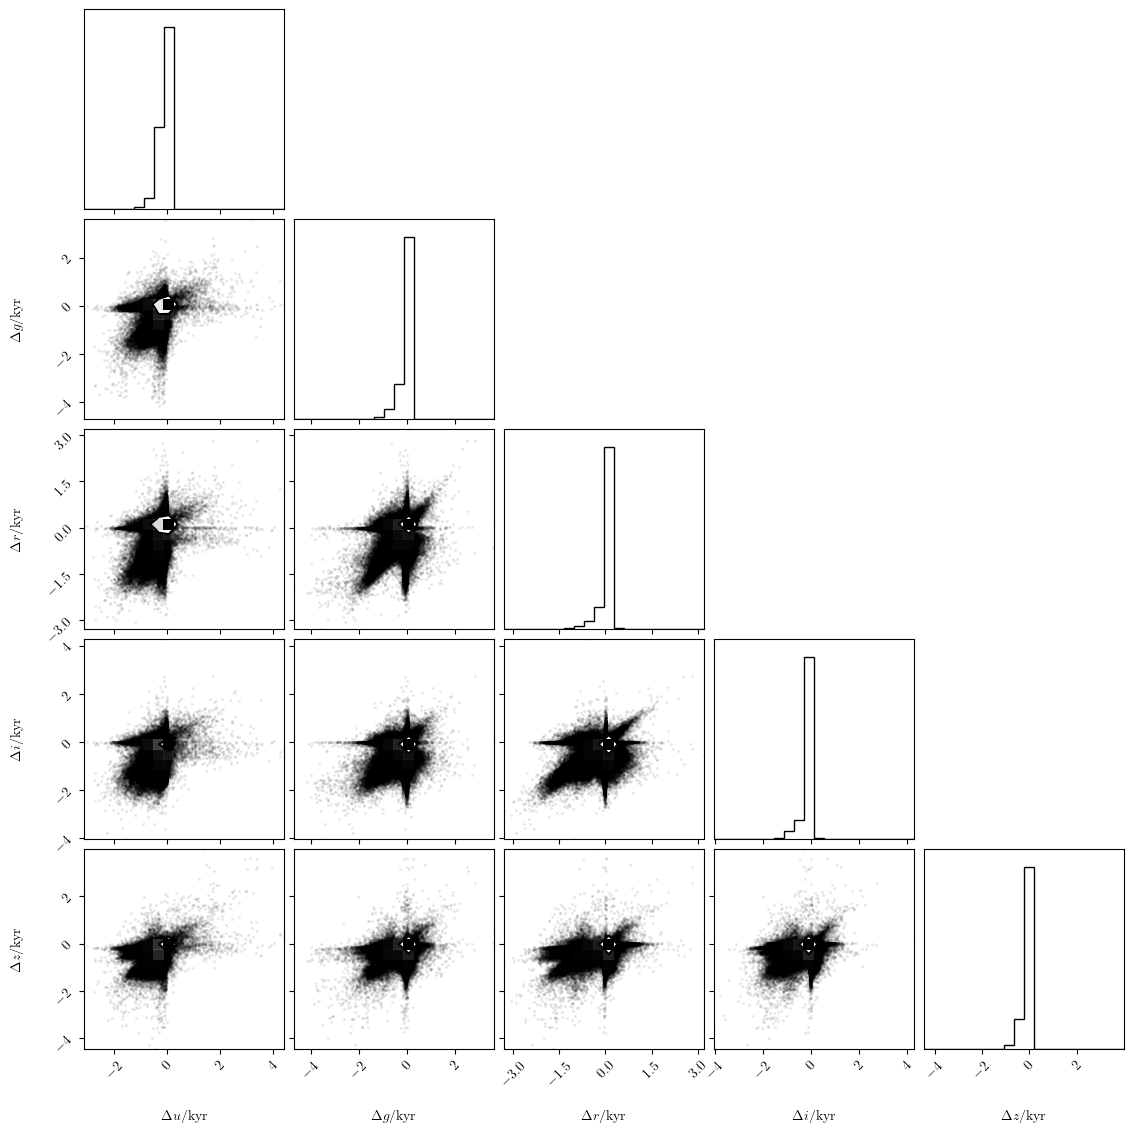

In [9]:
import corner
fig = corner.corner(clean[[f'Delta_{band}_per_kyr' for band in bands]], labels=[fr'$\Delta {band}/'+r'{\rm kyr}$' for band in bands], dpi=300)

In [10]:
M_G = clean['phot_g_mean_mag'] - 5*np.log10(clean['r_med_photogeo']) + 5 - clean['ag_gspphot']
clean['M_G'] = M_G

/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
clean.to_csv('../data/OutputFiles/cleaned_sample_with_dMag_per_time_and_MG.csv')

In [12]:
for band in bands:
    dif = clean[f'Sdss_mag_{band}']-clean[band]
    clean.loc[:,f'Delta_{band}'] = dif

/Users/carina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


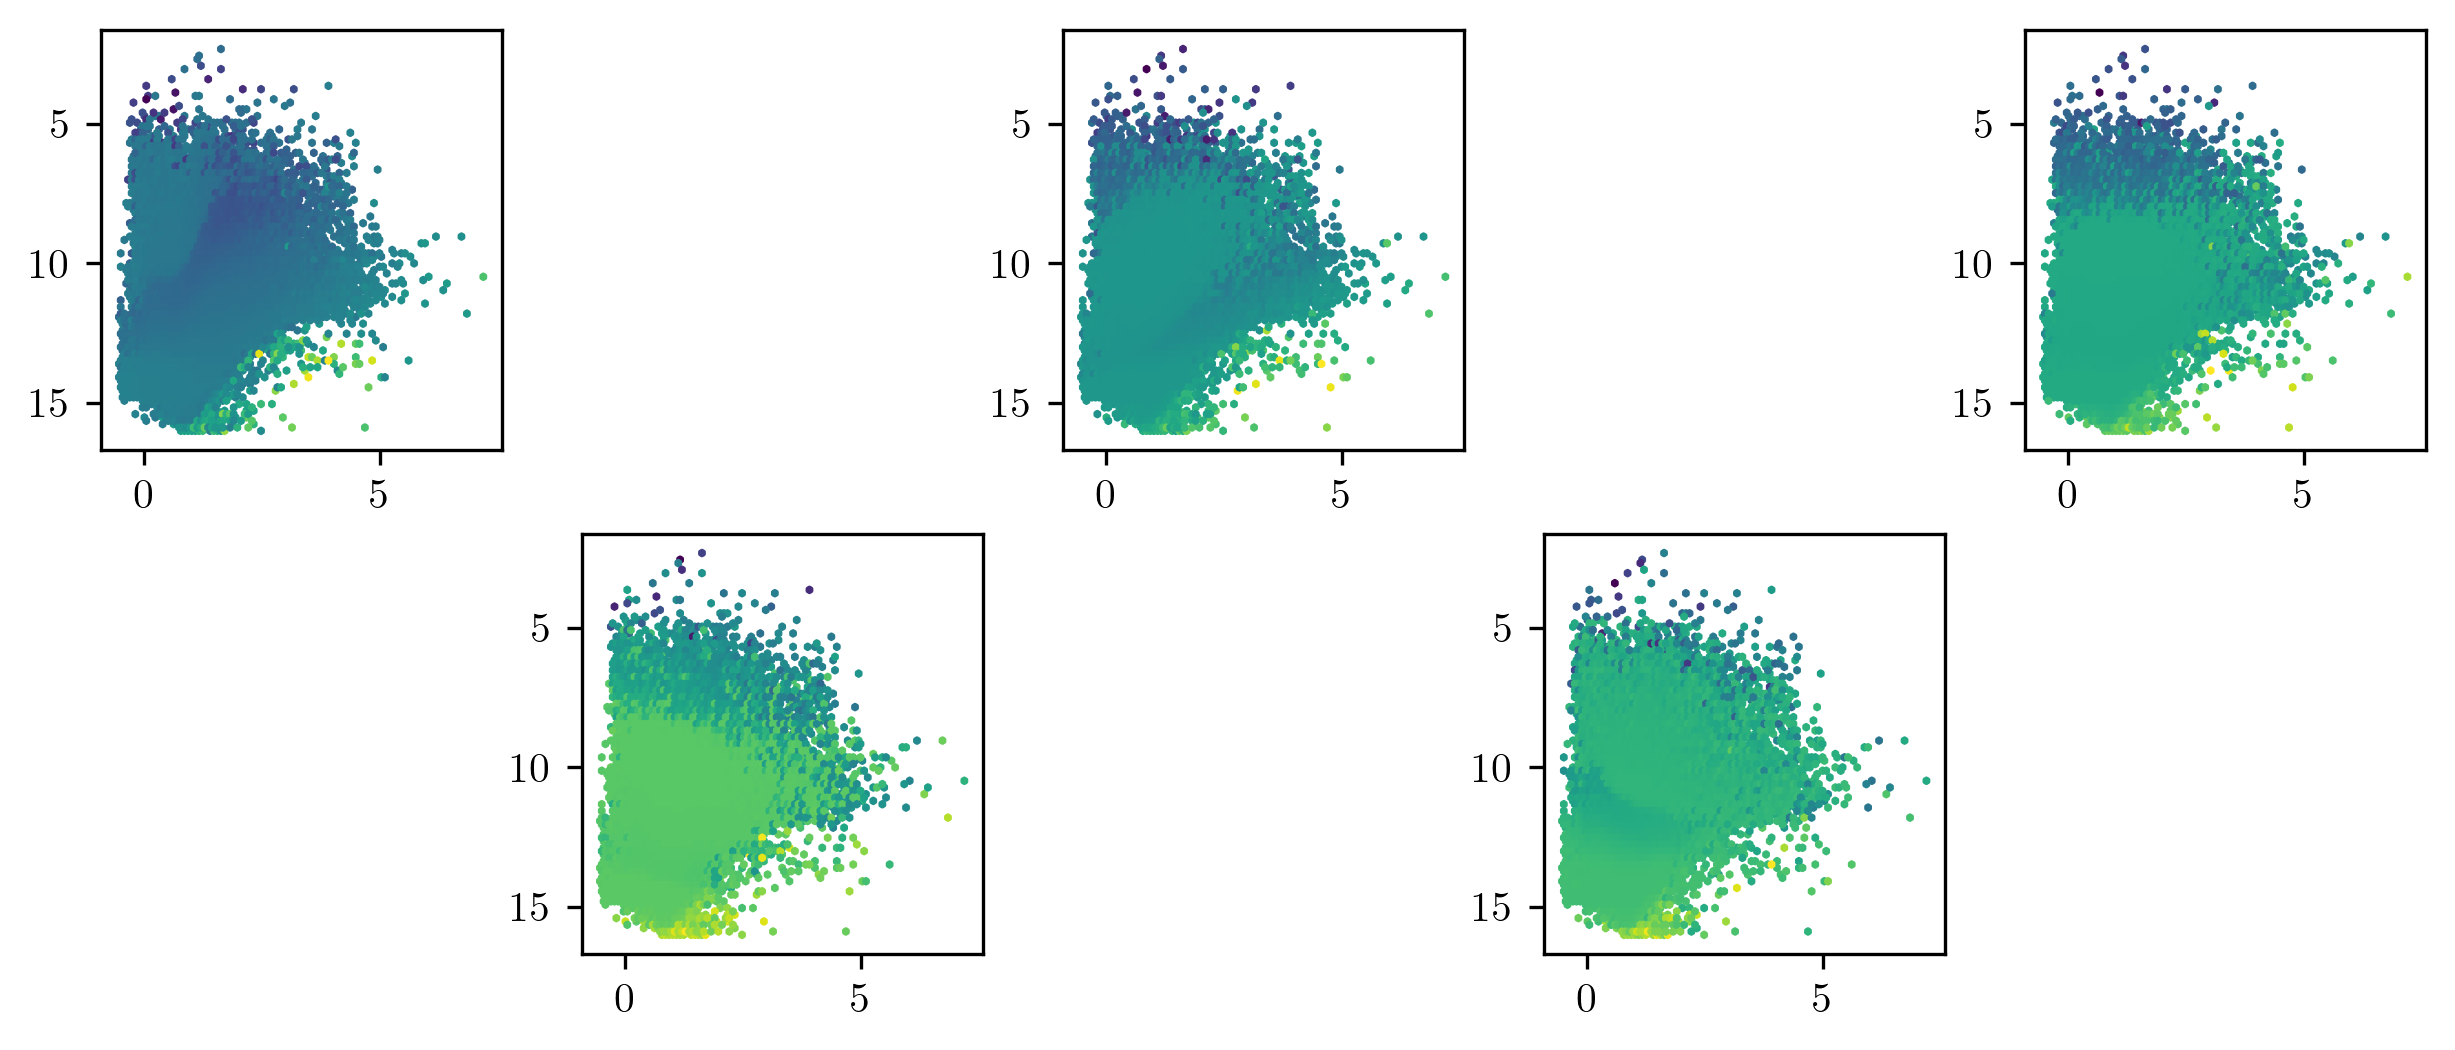

In [20]:
mosaic = """
u.g.r
.i.z.
"""

fig, ax = plt.subplot_mosaic(mosaic, figsize=(10,4), dpi=300, sharex=True, sharey=True)

for band in bands:
    ax[band].hexbin(clean['bp_rp'],clean['phot_g_mean_mag'], C=clean[f'Delta_{band}'], 
                    reduce_C_function=np.median, rasterized=True)
    ax[band].invert_yaxis()
    ax[band].set_title(band)

In [32]:
from scipy.stats import binned_statistic_2d
_, x_edge, y_edge, binnumber = binned_statistic_2d(clean['bp_rp'], clean['phot_g_mean_mag'], values=None, statistic='count', bins=100)

statistics, x_edge, y_edge, binnumber = binned_statistic_2d(clean['bp_rp'], clean['phot_g_mean_mag'], 
                                                            clean[[f'Delta_{band}' for band in bands]].values, 
                                                            bins=[x_edge, y_edge])

AttributeError: The number of `values` elements must match the length of each `sample` dimension.

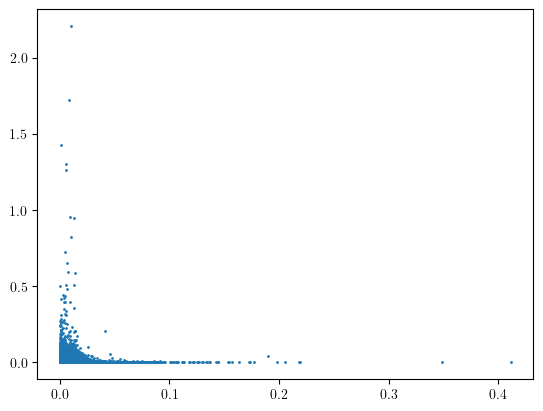

In [29]:
plt.scatter(clean['err_g'], clean['Sdss_mag_g_error'], s=1)

reselect sample, drop u/z, grab dereddened photometry, with good Sloan photometry with best Gaia spectra, with distance uncertainties < 10% (parallax? inversion?), SDSS photometry with errors below 0.01 in gri, grab Gaia spectra DF